## **Sentiment Analyses of Linganore-Oakdale-Urbana Area Redistricting**

author: Meng Chen                                                       

### **1. Introduction**
Linganore-Oakdale-Urbana (LOU) Area is located in the southeastern area of the Frederick County of Maryland. During last ten years, the local communities have been transformed into well-maintained suburban residency for people who work in the Washington-Maryland area. Many professionals, such as administrative government employees or military personals chose to live in these neighborhoods, despite the distant transportation between their working places and homes. Even some government facilities have been located in this area. For an example, the Social Security Data Center is located next to the Park and Ride of the Exit 26 of Interstate-270 in the Urbana area. Recently, [Kite Pharma](https://www.kitepharma.com) is starting to build a pharmaceutical manufacturing facility here, and along its side, there will be a hotel and restaurant chain established in two years. Urbana area has become the prime area for both business and residents.

These ongoing developments bring prosperity to the local communities. So does anxiety. For an example, the workforce brought by Kite Pharma has been estimated about 200-300 employees initially to 700-900 by its capacity. Such huge workforce will need hundreds of homes to accommodate their housing needs. Thus, the estate projects have been steadfastly developed in this area. More and more houses starts to show themselves off the landscape. However, only two new elementary schools have been added to the area, which obviously could not alleviate overcrowd situations in local schools. It becomes clear that, without any additional government funding, the Board of Education of Frederick County has an urgent need to conduct school redistricting at the basis of changing feeder patterns.

Starting in January, 2019, Frederick County has contracted with Cropper GIS Consulting to conduct the redistricting study, which is expected to completed by the end of the 2019. This study primarily focuses on attendance boundary and feeder patterns for two new schools that supposedly address the enrollment growth in LOU area and provides projections of the school enrollments in next five-eight years. Based on the message of the Board of Education, the redistricting roots in their core belief that all students are entitled equally to respect, opportunity, and excellence ([here for details](https://www.fcps.org/capital-program/linganore-oakdale-urbana-area-redistricting-study)). However, after the Public Engagement Session in March, 2019, the proposed attendance boundary stirred the outrage from local communities based on analyses of the parents' feedbacks provided by the study. Most of parents show extremely frustrated by new attendance boundaries. Some parents in Urbana area for example organized a local hearing to express their frustration to a member of the Board of Education. With entirely two new options proposed in the Public Engagement Session in June, 2019, such outrage seems to be alleviated based on an initial assessment. Unfortunately, the quantitative assessment of parents' preferences were not available to the public prior to the superintendent's recommendation that was presented on September 11, 2019.

This project primarily focuses on the sentiment and preferences of parents for new proposed options after the Public Engagement Session in June, 2019. The parents' preferable options will be compared with the plan of the superintendent's recommendation to investigate whether Board of Education's choices are aligned with parents' preferences and seek potential explanation. These will help board members understand the if parents support or oppose which option in a quantitative way and identify which communities have been mostly affected after June's proposal. In addition, the results will aid parents to recognize the educational needs of the majority of the their local communities.

### **2. Data Origination**
This original survey data after meetings can be download as single [PDF files](https://www.fcps.org/capital-program/lou-meetings).
The GPS coordinates are in shapefile that can be download at Frederick County [website](https://www.frederickcountymd.gov/5969/Download-GIS-Data).                        
See README.md for details.

### **3. Data preprocessing**

### Processing data

In [1]:
from redistrict import *

In [2]:
# old school names
sch_names_old = ['Centerville ES', 'Deer Crossing ES', 'Green Valley ES', 
                 'Kemptown ES','Liberty ES', 'New Market ES', 
                 'Oakdale ES', 'Spring Ridge ES', 'Twin Ridge ES', 
                 'Urbana ES', 'Gov. T.J. MS', 'New Market MS', 
                 'Oakdale MS', 'Urbana MS', 'Windsor Knolls MS',
                 'Linganore HS', 'Oakdale HS', 'Urbana HS']
# column names
columns = ['Live-in School', 'Comments of ES, option A']

### Extract data from tables of pdf

In [3]:
data = 'data/comments/LOU_SurveyResultsJune.pdf'
tables = camelot.read_pdf(data, pages='4-26')

### Clean up the data

In [4]:
df_table = get_pdf_data(tables, columns)
schools = df_table['Live-in School']
df_table = df_table.loc[schools.isin(sch_names_old)]

### Visualize the data in Word Cloud

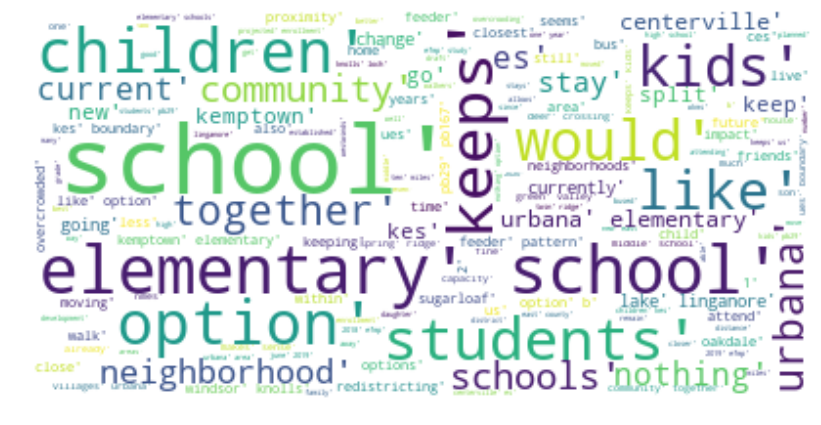

In [5]:
plot_words(df_table)

In [2]:

sch_comments = SchoolComments(sch_names_old)
# all school new names
sch_names = sch_comments.make_dict()[1]
elementary_schs = sch_comments.make_dict()[2]
middle_schs = sch_comments.make_dict()[3]
high_schs = sch_comments.make_dict()[4]

# save the comments
fname = 'data/comments/LOU_results.xlsx'
sheet_name = 'All_data'
sch_comments.write_comments(fname, sheet_name)

/Users/mengchen/Documents/GitHub/2019_LOU_Redistricting_Sentiment/redistrict.py:70: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  comments = df[df.School == sch][df.Option == opt].Comments


### **4. Sentiment analysis**
#### **4.1 Calculating sentiment scores of the surveys for each school district**
The SentiAnalysis is a class that processes either a string or a text file. It takes arthmetic, geometric, harmonic weighting to score the sentiment. The database of the word sentiment is SentiWordNet 3.0 and you can download it from [the its website](http://sentiwordnet.isti.cnr.it).                           
See README.md for details.

In [3]:
# mean socre
scores_mean = get_score(sch_names)[0]
# percentage score
scores_per = get_score(sch_names)[1]
# raw scores
scores_raw = get_score(sch_names)[2]

#### **4.2 Convert shapefile to Geojson**
The shapefiles provided by Frederick County is based on spatial reference EPSG 2248 for Maryland. To plot the results in world map, the spatial reference has been converted to EPSG 4326.             
Class Shape2Json is developed to convert the shapefile to corresponding Geojson file. 
The conversion will be processed by `pyproj` module, and it takes **LONG** time to finish the job. Please be patient.      
See README.md for details.

In [4]:
# for elementary schools
json_es = Shape2Json('data/shapefiles/Elementary_School_Districts.shp', 
                     'results/json_es.json', 
                     'results/json_es_converted.json', 
                     'SCHOOL_1', 
                     elementary_schs)
json_es.convert_json()
json_es.convert_epsg()
json_es.get_coordinates()
coordinates_es = json_es.coordinates

Converting the shapefile of elementary school district to json ...
coverting its coordinates ...
getting GPS coordinates ...


In [ ]:
# for middle schools
json_ms = Shape2Json('data/shapefiles/Middle_School_Districts.shp', 
                     'Results/json_ms.json', 
                     'Results/json_ms_converted.json',
                     'SCHOOL', 
                     middle_schs)
json_ms.convert_json()
json_ms.convert_epsg()
json_ms.get_coordinates()
coordinates_ms = json_ms.coordinates

In [ ]:
# for high schools
json_hs = Shape2Json('data/shapefiles/High_School_Districts.shp', 
                     'results/json_hs.json', 
                     'results/json_hs_converted.json',
                     'SCHOOL', 
                     high_schs)
json_hs.convert_json()
json_hs.convert_epsg()
json_hs.get_coordinates()
coordinates_hs = json_hs.coordinates

#### **4.3 Fix the coordinates missing from previous program**
A couple of school coordinates are missing due the incapable of finding the coordinates based on the address. So I manually search at [MapQuest Developer website](https://developer.mapquest.com/documentation/tools/latitude-longitude-finder/) to find those coordinates and updated the `coordinates_es`, `coordinates_ms`, and `coordinates_hs`, accordingly.

In [5]:
"""
Based on the search at MapQuest Developer website:

"""
coordinates_es['Deer Crossing Elementary'] = (39.4038, -77.2913)
coordinates_es['Kemptown Elementary'] = (39.3297, -77.2341)
coordinates_es['Oakdale Elementary'] = (39.3955, -77.3189)
coordinates_es['Green Valley Elementary'] = (39.3434, -77.2657)

coordinates_ms['Urbana Middle'] = (39.330684, -77.336379)
coordinates_ms['Windsor Knolls Middle'] = (39.322002, -77.278516)
coordinates_ms['Oakdale Middle'] = (39.337555, -77.305634)

coordinates_hs['Oakdale High'] = (39.394418, -77.309328)
coordinates_hs['Urbana High'] = (39.324881, -77.339102)

### **5. Visualize the results**
See README for details.

In [ ]:
# Elementary schools option A
map_plot1(coordinates_es, scores_per, 'A', 
        'results/json_es_converted.json', 'es')

In [ ]:
# Elementary schools option B
map_plot(coordinates_es, scores_per, 'B', 
        'results/json_es_converted.json', 'es')

In [ ]:
# Middle schools, option A
map_plot(coordinates_ms, scores_per, 'A', 
        'results/json_ms_converted.json', 'ms')

In [ ]:
# Middle schools, option B
map_plot(coordinates_ms, scores_per, 'B', 
        'results/json_ms_converted.json', 'ms')

In [ ]:
# High schools, option A
map_plot(coordinates_hs, scores_per, 'A', 
        'results/json_hs_converted.json', 'hs')

In [ ]:
# High schools, option B
map_plot(coordinates_hs, scores_per, 'B', 
        'results/json_hs_converted.json', 'hs')